In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_excel("Lojistik.xlsx")

In [3]:
df = df.set_index("Seri Adı").T
df.index = df.index.astype(int)

In [4]:
degiskenler = [
    "Tarımda istihdam (% toplam istihdam) (modellenmiş ILO tahmini)",
    "Tarım, ormancılık ve balıkçılık, katma değer (% GSYİH)",
    "Tarımdan Kaynaklanan Karbondioksit (CO2) Emisyonları (Mt CO2e)",
    "Gübre tüketimi (ekilebilir arazi hektarı başına kilogram)",
    "Sanayi (inşaat dahil), katma değer (% GSYİH)",
    "Sanayide istihdam (% toplam istihdam) (modellenmiş ILO tahmini)",
    "Enerji Sanayinden Kaynaklanan Karbondioksit (CO2) Emisyonları (Mt CO2e)",
    "İnternet kullanan bireyler (% nüfus)",
    "Yüksek teknoloji ihracatı (% imalat ihracatı)",
    "Araştırma ve geliştirme harcamaları (% GSYİH)"
]

In [5]:
etiketler = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

In [6]:
X = df[degiskenler].T
y = etiketler

In [7]:
X = X.apply(pd.to_numeric, errors="coerce")

In [8]:
X = X.fillna(X.mean())

In [9]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred = model.predict(X_test)

In [13]:
print("Doğruluk Oranı:", accuracy_score(y_test, y_pred))
print("\nHata Matrisi:\n", confusion_matrix(y_test, y_pred))
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))

Doğruluk Oranı: 0.6666666666666666

Hata Matrisi:
 [[0 1]
 [0 2]]

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



C:\Users\Fscy6\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fscy6\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fscy6\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

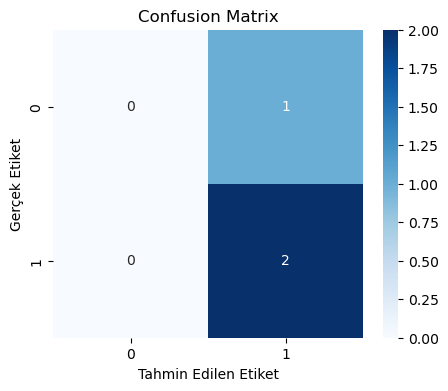

In [15]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Tahmin Edilen Etiket")
plt.ylabel("Gerçek Etiket")
plt.title("Confusion Matrix")
plt.show()

In [16]:
from sklearn.metrics import classification_report
import pandas as pd

In [17]:
report = classification_report(y_test, y_pred, output_dict=True)

C:\Users\Fscy6\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fscy6\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Fscy6\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
df_report = pd.DataFrame(report).transpose()

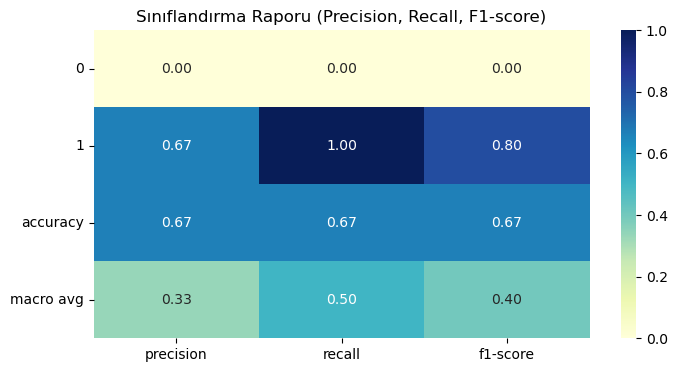

In [19]:
plt.figure(figsize=(8, 4))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Sınıflandırma Raporu (Precision, Recall, F1-score)")
plt.yticks(rotation=0)
plt.show()

In [20]:
katsayilar = pd.DataFrame({
    "Değişken": X.columns,
    "Katsayı (Etki)": model.coef_[0]
})

In [21]:
katsayilar["|Etki|"] = katsayilar["Katsayı (Etki)"].abs()
katsayilar = katsayilar.sort_values("|Etki|", ascending=True)

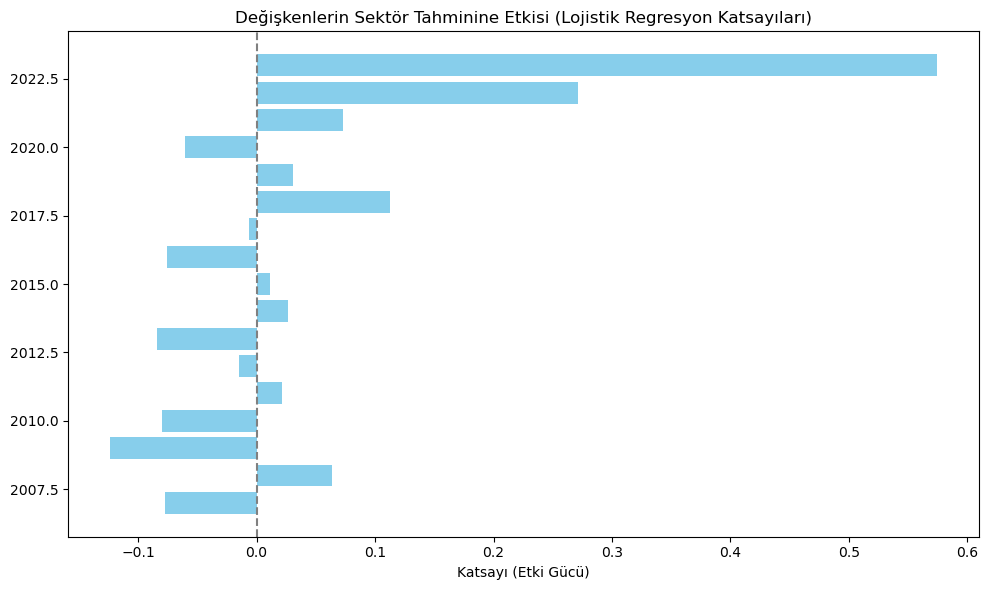

In [22]:
plt.figure(figsize=(10, 6))
plt.barh(katsayilar["Değişken"], katsayilar["Katsayı (Etki)"], color='skyblue')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("Katsayı (Etki Gücü)")
plt.title("Değişkenlerin Sektör Tahminine Etkisi (Lojistik Regresyon Katsayıları)")
plt.tight_layout()
plt.show()

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
rf_model = RandomForestClassifier(random_state=42)

In [25]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_pred_rf = rf_model.predict(X_test)

In [27]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Doğruluk Oranı: {accuracy_rf:.2f}")

Random Forest Doğruluk Oranı: 0.67


In [28]:
print("Hata Matrisi (Confusion Matrix):")
print(confusion_matrix(y_test, y_pred_rf))

Hata Matrisi (Confusion Matrix):
[[1 0]
 [1 1]]


In [29]:
print("Sınıflandırma Raporu (Classification Report):")
print(classification_report(y_test, y_pred_rf))

Sınıflandırma Raporu (Classification Report):
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=True)

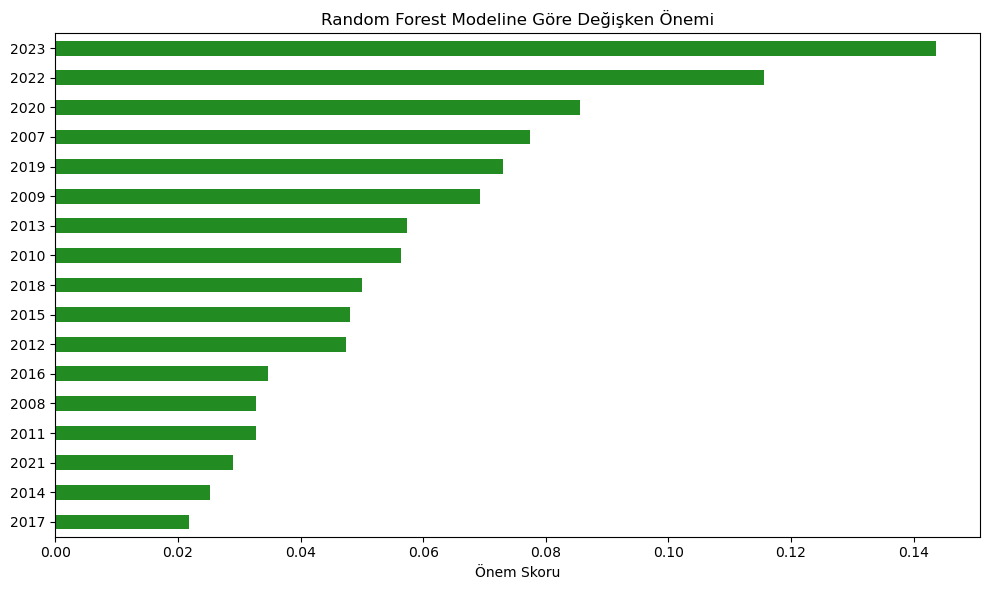

In [32]:
plt.figure(figsize=(10,6))
feature_importances.plot(kind='barh', color='forestgreen')
plt.title("Random Forest Modeline Göre Değişken Önemi")
plt.xlabel("Önem Skoru")
plt.tight_layout()
plt.show()

In [33]:
print(df.columns.tolist())

['Sanayi (inşaat dahil), katma değer (% GSYİH)', 'Tarımda istihdam (% toplam istihdam) (modellenmiş ILO tahmini)', 'Tarım, ormancılık ve balıkçılık, katma değer (% GSYİH)', 'İnternet kullanan bireyler (% nüfus)', 'Yüksek teknoloji ihracatı (% imalat ihracatı)', 'Araştırma ve geliştirme harcamaları (% GSYİH)', 'Sanayide istihdam (% toplam istihdam) (modellenmiş ILO tahmini)', 'Tarımdan Kaynaklanan Karbondioksit (CO2) Emisyonları (Mt CO2e)', 'Gübre tüketimi (ekilebilir arazi hektarı başına kilogram)', 'Enerji Sanayinden Kaynaklanan Karbondioksit (CO2) Emisyonları (Mt CO2e)']


In [34]:
df = df.apply(pd.to_numeric, errors='coerce')

In [35]:
tarim_deg = [
    'Tarımda istihdam (% toplam istihdam) (modellenmiş ILO tahmini)',
    'Tarım, ormancılık ve balıkçılık, katma değer (% GSYİH)',
    'Tarımdan Kaynaklanan Karbondioksit (CO2) Emisyonları (Mt CO2e)',
    'Gübre tüketimi (ekilebilir arazi hektarı başına kilogram)'
]

In [36]:
df_tarim = df[tarim_deg]

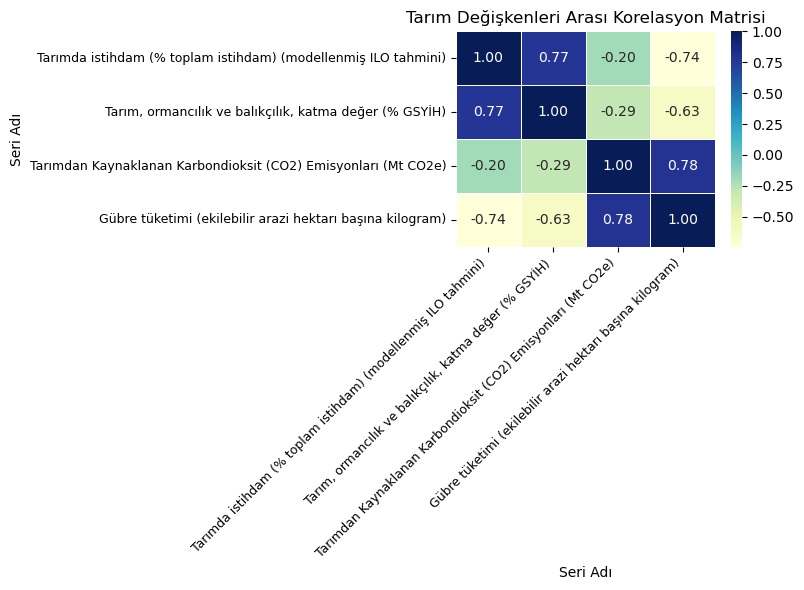

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_tarim.corr(), annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title("Tarım Değişkenleri Arası Korelasyon Matrisi", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig("korelasyon_tarim.png")
plt.show()

In [38]:
sanayi_deg = [
    'Sanayi (inşaat dahil), katma değer (% GSYİH)',
    'Sanayide istihdam (% toplam istihdam) (modellenmiş ILO tahmini)',
    'Enerji Sanayinden Kaynaklanan Karbondioksit (CO2) Emisyonları (Mt CO2e)',
    'Yüksek teknoloji ihracatı (% imalat ihracatı)',
    'Araştırma ve geliştirme harcamaları (% GSYİH)',
    'İnternet kullanan bireyler (% nüfus)'
]

In [39]:
df_sanayi = df[sanayi_deg]

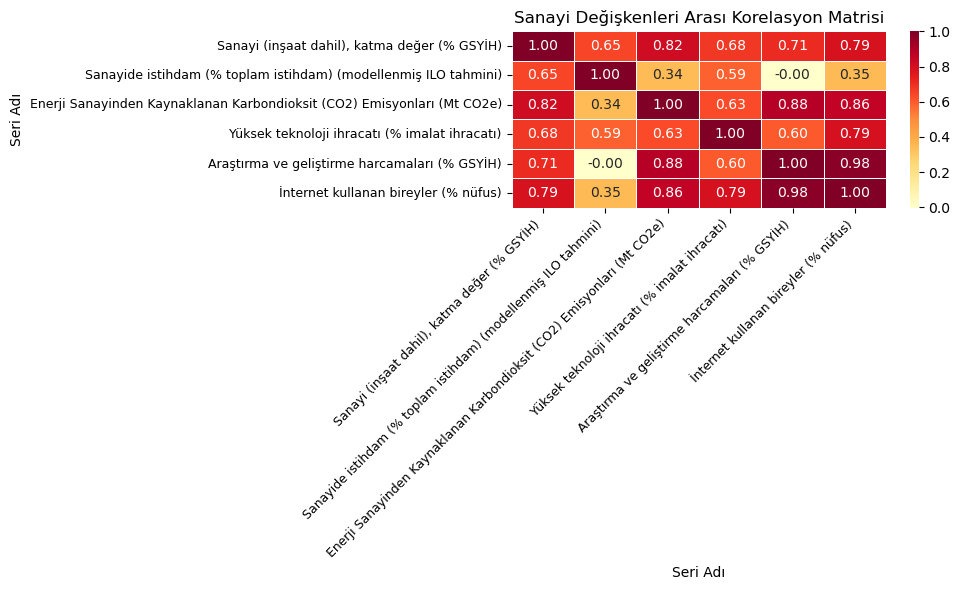

In [41]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_sanayi.corr(), annot=True, cmap='YlOrRd', fmt=".2f", linewidths=0.5)
plt.title("Sanayi Değişkenleri Arası Korelasyon Matrisi", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig("korelasyon_sanayi.png")
plt.show()